In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [5]:
#load file with cleaned data from prev lessons using read_csv
data = pd.read_csv('merged_clean_ver1.csv')

In [6]:
data.head()

,id,state,gender,median_home_val,hvp1,pobc1,pobc2,avggift,target_d,median_household_income,ic2,ic3,ic4,ic5,ic2_,quantile_ic3
0,44060,FL,Male,1158.286575,7,6,16,28,100.0,392,430.0,466,520.0,21975.0,Moderate,"(365.0, 479.75]"
1,96093,IL,Male,537.000000,0,1,89,5,7.0,365,415.0,410,473.0,19387.0,Moderate,"(365.0, 479.75]"
2,43333,FL,Female,725.000000,3,11,17,4,5.0,301,340.0,361,436.0,18837.0,Low,"(287.0, 365.0]"
3,21885,NC,Male,1158.286575,7,1,74,27,38.0,401,407.0,399,413.0,14014.0,Moderate,"(365.0, 479.75]"
4,190108,FL,Female,995.000000,0,5,6,6,5.0,252,280.0,316,348.0,17991.0,Low,"(287.0, 365.0]"


### Descriptive Statistics- basics

In [7]:
data.describe()
# data.describe(include=[np.number])

,id,median_home_val,hvp1,pobc1,pobc2,avggift,target_d,median_household_income,ic2,ic3,ic4,ic5
count,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3993.000000,3994.000000
mean,98914.900100,1158.286575,15.930396,6.863545,55.454181,11.402103,15.664119,351.614422,400.702554,399.856284,444.732031,16455.242614
std,58179.679261,1033.400320,28.824767,9.514572,21.500978,10.219433,12.701582,168.468186,180.547153,164.806947,175.004178,9454.423754
min,12.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46135.000000,548.250000,0.000000,1.000000,41.000000,7.000000,10.000000,239.000000,284.000000,287.000000,325.000000,11136.750000
50%,101411.000000,803.000000,1.000000,4.000000,57.000000,10.000000,14.000000,318.000000,366.000000,365.000000,410.000000,14355.000000
75%,151647.000000,1349.000000,14.000000,9.000000,73.000000,14.000000,20.000000,425.000000,477.750000,479.750000,528.000000,18779.250000
max,191779.000000,5982.000000,99.000000,79.000000,99.000000,450.000000,200.000000,1500.000000,1500.000000,1311.000000,1331.000000,174523.000000


In [8]:
data.describe(include=[np.object])

,state,gender,ic2_,quantile_ic3
count,3994,3994,3994,3994
unique,52,3,4,4
top,CA,Female,Low,"(-0.001, 287.0]"
freq,751,2277,2101,1010


In [9]:
#make a statistics summary df with transpose
summary = data.describe().T
#calculate the interquartile range as a new column
summary['iqr'] = summary['75%']-summary['25%']
summary

,count,mean,std,min,25%,50%,75%,max,iqr
id,3994.0,98914.900100,58179.679261,12.0,46135.00,101411.0,151647.00,191779.0,105512.00
median_home_val,3994.0,1158.286575,1033.400320,0.0,548.25,803.0,1349.00,5982.0,800.75
hvp1,3994.0,15.930396,28.824767,0.0,0.00,1.0,14.00,99.0,14.00
pobc1,3994.0,6.863545,9.514572,0.0,1.00,4.0,9.00,79.0,8.00
pobc2,3994.0,55.454181,21.500978,0.0,41.00,57.0,73.00,99.0,32.00
avggift,3994.0,11.402103,10.219433,2.0,7.00,10.0,14.00,450.0,7.00
target_d,3994.0,15.664119,12.701582,1.0,10.00,14.0,20.00,200.0,10.00
median_household_income,3994.0,351.614422,168.468186,0.0,239.00,318.0,425.00,1500.0,186.00
ic2,3994.0,400.702554,180.547153,0.0,284.00,366.0,477.75,1500.0,193.75
ic3,3994.0,399.856284,164.806947,0.0,287.00,365.0,479.75,1311.0,192.75


### Exploratory data analysis using matplotlib

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

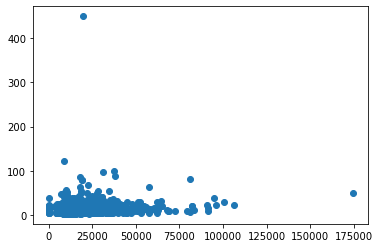

In [11]:
plt.scatter(x=data['ic5'], y=data['avggift'])
plt.show()

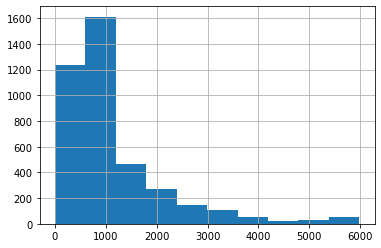

In [12]:
data['median_home_val'].hist()
plt.show()

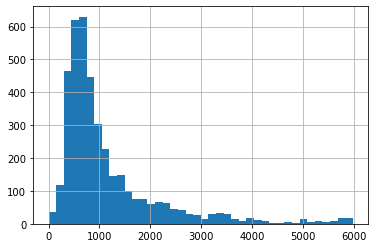

In [13]:
data['median_home_val'].hist(bins=40)
plt.show()

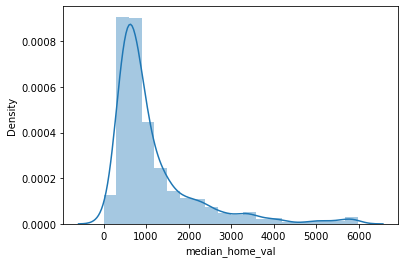

In [14]:
sns.distplot(data['median_home_val'], bins=20)
plt.show()

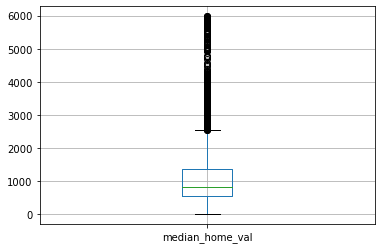

In [15]:
data[['median_home_val']].boxplot()
plt.show()

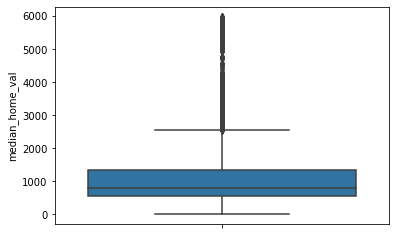

In [16]:
sns.boxplot(y="median_home_val", data=data)
plt.show()

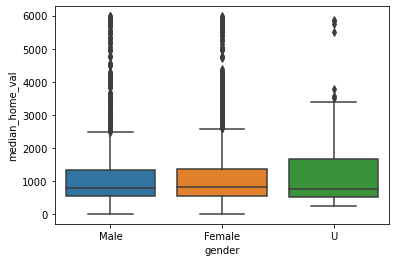

In [17]:
sns.boxplot(x = 'gender',y='median_home_val', data=data)
plt.show()

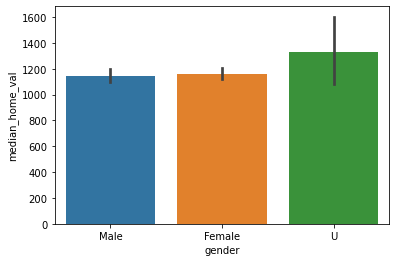

In [18]:
sns.barplot(x="gender", y="median_home_val", data=data)
plt.show()

### Correlation

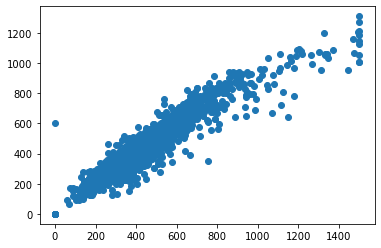

In [19]:
#review correlation of two selected variables 
plt.scatter(x=data['ic2'], y=data['ic3'])
plt.show()

In [20]:
#bring in the scipy library - The scientific python library
# an open-source Python library which is used to solve scientific and mathematical problems. 
# It is built on the NumPy extension and allows the user to manipulate and visualize data.
import scipy.stats as stats

In [21]:
x=data['ic2']
y=data['ic3']
stats.pearsonr(x, y) # gives correlation coefficient and the p value 

(0.9535793251204261, 0.0)

In [22]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9510359736169883, pvalue=0.0)

In [23]:
stats.kendalltau(x, y)

KendalltauResult(correlation=0.8254103909775706, pvalue=0.0)

In [24]:
#create a correlation matrix of numerical columns 

corr_data = data.drop(['id','state', 'gender'], axis=1)
correlations_matrix = corr_data.corr()
correlations_matrix

,median_home_val,hvp1,pobc1,pobc2,avggift,target_d,median_household_income,ic2,ic3,ic4,ic5
median_home_val,1.000000,0.925146,0.428397,-0.297105,0.139264,0.116841,0.707205,0.743315,0.734544,0.748761,0.745241
hvp1,0.925146,1.000000,0.424981,-0.261078,0.128645,0.105438,0.611131,0.637037,0.647877,0.656722,0.628138
pobc1,0.428397,0.424981,1.000000,-0.390109,0.069040,0.039139,0.166611,0.167175,0.186662,0.179921,0.165818
pobc2,-0.297105,-0.261078,-0.390109,1.000000,-0.075860,-0.072210,-0.149703,-0.162401,-0.177378,-0.187705,-0.248284
avggift,0.139264,0.128645,0.069040,-0.075860,1.000000,0.487483,0.121086,0.136900,0.126144,0.133296,0.142096
target_d,0.116841,0.105438,0.039139,-0.072210,0.487483,1.000000,0.113259,0.129979,0.121995,0.131260,0.137908
median_household_income,0.707205,0.611131,0.166611,-0.149703,0.121086,0.113259,1.000000,0.951409,0.974768,0.928980,0.805217
ic2,0.743315,0.637037,0.167175,-0.162401,0.136900,0.129979,0.951409,1.000000,0.953579,0.971498,0.874779
ic3,0.734544,0.647877,0.186662,-0.177378,0.126144,0.121995,0.974768,0.953579,1.000000,0.971909,0.827524
ic4,0.748761,0.656722,0.179921,-0.187705,0.133296,0.131260,0.928980,0.971498,0.971909,1.000000,0.868411


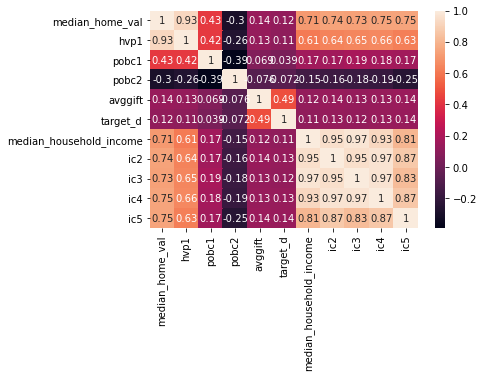

In [25]:
#create a heatmap 
sns.heatmap(correlations_matrix, annot=True)
plt.show()

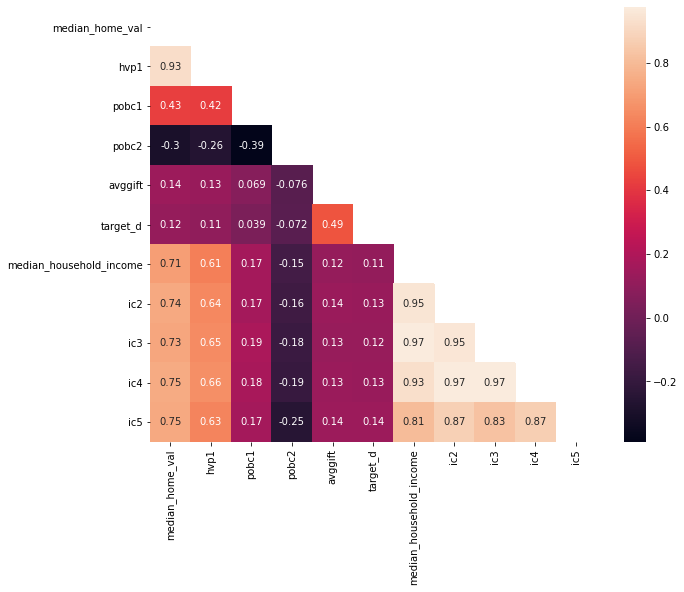

In [26]:
#use the mask technique to make it easier to read 
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()